In [2]:
# import what you need ! 

import sys
sys.path.append('../modules/')

import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import pandas as pd
import subprocess as sp
from subprocess import Popen
import os

# our modules: 
import notepicker
#import makeDataChord_v2 as mDc # read in below. 
#import writeCmixSco_GRAN_v2 as wRT_gran
import writeCmixSco_WT_ac as wRT_wt
# _ac stands for autocheck

%matplotlib inline

# ======================================================
# autocheck for your RTcmix installation type: 
cmixStatus, cmixResult = sp.getstatusoutput("CMIX")
if cmixStatus == 0:
    cmixInstalled = True
    print("CMIX found.")
else:
    cmixInstalled = False
    print("CMIX not found, using pyGoRTcmix instead.")
# ======================================================

%matplotlib inline

CMIX not found, using pyGoRTcmix instead.


In [3]:
data_path = 'C:\\Users\\xiezh\\Documents\\programming_and_electronics\\datamovies_y21\\data\\'
with open(data_path+'whos_hungry_heartrate.txt', 'r') as f:
    l = f.readlines()
    
l = [s[7:] for s in l if 'OK' not in s]
l = [int(s) for s in l]

dur = np.arange(len(l))

Text(0.5, 0, 'Time (s)')

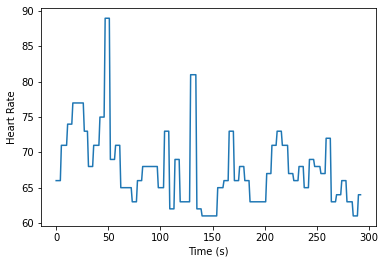

In [4]:
plt.plot(dur, l)
plt.ylabel('Heart Rate')
plt.xlabel('Time (s)')

In [5]:
# apply polynomial smoothing to the data
from scipy.signal import savgol_filter
l = savgol_filter(l, 15, 3) # window size 51, polynomial order 3

Text(0.5, 0, 'Time (s)')

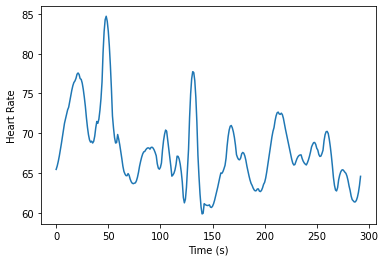

In [6]:
plt.plot(dur, l)
plt.ylabel('Heart Rate')
plt.xlabel('Time (s)')

In [7]:
p1 = l

In [8]:
# OR USE OTHER MUSICAL STRUCTURES ! 
modes = {
    'ionian':[2,2,1,2,2,2,1],
    'dorian':[2,1,2,2,2,1,2],
    'phrygian':[1,2,2,2,1,2,2],
    'lydian':[2,2,2,1,2,2,1],
    'mixolydian':[2,2,1,2,2,1,2],
    'aeolian':[2,1,2,2,1,2,2],
    'lochrian':[1,2,2,1,2,2,2]
}

intervals = modes['phrygian'] + modes['phrygian'] # + modes['mixolydian']
print(intervals)
elements = np.cumsum(intervals[:-1])
print(elements)
#indexes = np.array(x)

root = 220

def notename2freq(k,v,f0):
    freqs = f0*2**(v+k/12)
    return freqs

pitches = notename2freq(elements,0,root) # minus one makes it start from one interval below, which is C2
print(pitches)

[1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2]
[ 1  3  5  7  8 10 12 13 15 17 19 20 22]
[233.08188076 261.6255653  293.66476792 329.62755691 349.22823143
 391.99543598 440.         466.16376152 523.2511306  587.32953583
 659.25511383 698.45646287 783.99087196]


Text(0, 0.5, 'pitches (T temperature)')

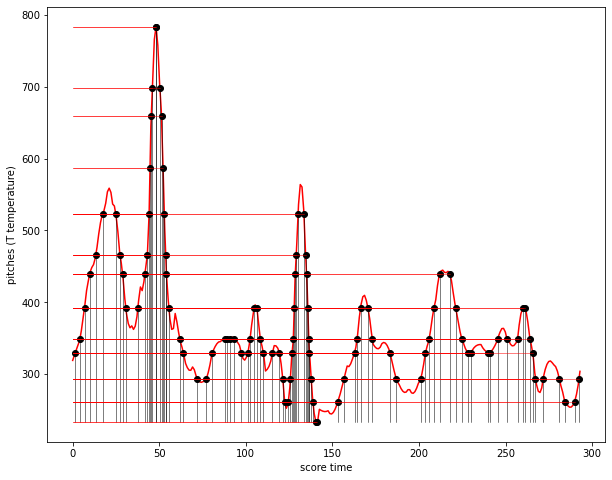

In [9]:
# n_octaves_total = 2
# root_note  = 220.0
# ints_per_oct = 12

# chromatic scale of n octaves: 
# intervals = np.linspace(0,n_octaves_total,int(n_octaves_total*ints_per_oct))
# pitches = root_note*(2**intervals)
# print(pitches)

# (2) Interpolate the y-values to a range of frequency (using notepicker !)
reload(notepicker)
p1_in_freq = notepicker.interpvals_to_freqs(p1,pitches)

# (3) Find where in time these values occur, use these as our start times and durations.
dur_sound = len(dur)
time = np.linspace(0,dur_sound,len(p1_in_freq))
scale_note_dur = 1
times, notes, durs = notepicker.findroots(time,p1_in_freq,pitches)


# plot the results: 
fig = plt.figure(figsize=(10,8))

time_tmp = np.linspace(time[0],time[-1],len(p1_in_freq))
plt.plot(time_tmp,p1_in_freq,'r-')
plt.plot(times,notes,'ko')

for ind,t in enumerate(times):
    plt.plot([t,t],[min(notes),notes[ind]],'k-',linewidth=0.5)
    plt.plot([0,t],[notes[ind],notes[ind]],'r-',linewidth=0.5)
    
plt.xlabel('score time')
plt.ylabel('pitches (T temperature)')

Text(0, 0.5, 'amps')

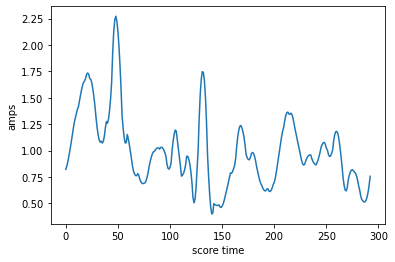

In [11]:
amps = (l - np.mean(l)) / np.std(l) * 0.35 + 1
plt.plot(amps)
plt.xlabel('score time')
plt.ylabel('amps')

In [12]:
# (4) write RTcmix Wavetable score
reload(wRT_wt)
base_name = 'whos_hungry'
trim = -1
tones_dict = {}
tones_dict['times'] = np.asarray(times[:trim])
tones_dict['notes'] = np.asarray(notes[:trim])
tones_dict['durs'] = np.asarray(durs[:trim]) 
tones_dict['amps'] = amps*2000
tones_dict['pans'] = np.ones(len(notes[:trim]))*0.5

score_name = wRT_wt.writesco(tones_dict,base_name)

whos_hungry.sco
CMIX not found; rtoutput() will not be used in score.


In [13]:
if cmixInstalled:
    cmix_cmd = 'CMIX < ' + base_name + '.sco'
    print(cmix_cmd)
else:
    dur = str(dur_sound)
    cmix_cmd = os.path.abspath('../pyGoRTcmix/pyGoRTcmix') + ' -inputscore ' + os.path.abspath(base_name + '.sco') + ' -output ' + os.path.abspath(base_name + '.wav') + ' -dur ' + dur
    print(cmix_cmd)

# the ! tells the notebook to run a command in the terminal
# the ! tells the notebook to run a command in the terminal
if sys.platform == 'win32':
    ! dir *.sco
else:
    ! ls *.sco

runCMIX = sp.Popen(cmix_cmd, shell=True) # if can only be called from a shell, use shell=True
runCMIX.wait()
print("\n" + "hopefully i just wrote your sound file; is it here?" + "\n")
if sys.platform == 'win32':
    ! dir *.wav
else:
    ! ls *.wav

#sp.run(['mv', score_name, '../3_output_nogit'])
#sp.run('mv *.wav ../3_output_nogit/', shell=True)

C:\Users\xiezh\Documents\programming_and_electronics\datamovies_y21\pyGoRTcmix\pyGoRTcmix -inputscore C:\Users\xiezh\Documents\programming_and_electronics\datamovies_y21\notebooks\whos_hungry.sco -output C:\Users\xiezh\Documents\programming_and_electronics\datamovies_y21\notebooks\whos_hungry.wav -dur 293
 Volume in drive C is Local Disk
 Volume Serial Number is 5E89-FF1C

 Directory of C:\Users\xiezh\Documents\programming_and_electronics\datamovies_y21\notebooks

04/16/2021  05:55 PM            10,838 whos_hungry.sco
               1 File(s)         10,838 bytes
               0 Dir(s)  31,738,839,040 bytes free

hopefully i just wrote your sound file; is it here?

 Volume in drive C is Local Disk
 Volume Serial Number is 5E89-FF1C

 Directory of C:\Users\xiezh\Documents\programming_and_electronics\datamovies_y21\notebooks

04/16/2021  06:00 PM        51,683,372 whos_hungry.wav
               1 File(s)     51,683,372 bytes
               0 Dir(s)  31,736,864,768 bytes free


In [14]:
delta = np.array(l[1:]) - np.array(l[:len(l)-1])

In [16]:
dur = len(l)
# (1) Decide the times at which you want to sample the data
print('data duration = ', len(l))
t_start = 0
t_end = len(l)
n_notes = len(l)
times = np.linspace(t_start,t_end,n_notes) 

stretch = 1
times_sco = times*stretch
dur_sound = str(times_sco[-1])
print('score duration = ', str(dur_sound))
dt = times_sco[2]-times_sco[1] # time interval btw each two notes
print(dt)

data duration =  293
score duration =  293.0
1.0034246575342465


In [17]:
# (2) Interpolate the y-values to a range of frequency 
# NOTE: we will use interpolate all the time ! play with it to understand what it is doing! 
data_range = np.linspace(min(delta),max(delta),100) # the number of points doesnt matter here ! 

base = 440
f_max = 880
f_min = base - (-min(delta) * (f_max - base)) / max(delta)
freq_range = np.linspace(f_min,f_max,100)

# np.interp(x, xp, yp) : 
# x is the array of discrete sampling values, xp is original x, yp is original y
# returns the y values at 

p1_f = np.interp(delta,data_range,freq_range)


In [26]:
# (3) Interpolate the frequency values at each time
pitches = np.interp(times,np.arange(len(p1_f)),p1_f)
print(pitches[0:10])

[487.30126248 502.52243973 514.70770506 523.85705846 529.97049994
 533.0480295  533.2418445  536.84333477 504.27030967 505.43693584]


In [27]:
# (4) write RTcmix Wavetable score
reload(wRT_wt)
base_name = 'change_rhythm'

tones_dict = {}
tones_dict['times'] = np.asarray(times_sco)
tones_dict['notes'] = np.asarray(pitches)
tones_dict['durs'] = np.ones(len(pitches))*dt*1 # the 0.8 makes for more discrete pitches
tones_dict['amps'] = np.ones(len(pitches))*2000
tones_dict['pans'] = np.ones(len(pitches))*1

score_name = wRT_wt.writesco(tones_dict,base_name)

change_rhythm.sco
CMIX not found; rtoutput() will not be used in score.


In [28]:
if cmixInstalled:
    cmix_cmd = 'CMIX < ' + base_name + '.sco'
    print(cmix_cmd)
else:
    dur = str(dur_sound)
    cmix_cmd = os.path.abspath('../pyGoRTcmix/pyGoRTcmix') + ' -inputscore ' + os.path.abspath(base_name + '.sco') + ' -output ' + os.path.abspath(base_name + '.wav') + ' -dur ' + dur
    print(cmix_cmd)

# the ! tells the notebook to run a command in the terminal
if sys.platform == 'win32':
    ! dir *.sco
else:
    ! ls *.sco

runCMIX = sp.Popen(cmix_cmd, shell=True) # if can only be called from a shell, use shell=True
runCMIX.wait()
print("\n" + "hopefully i just wrote your sound file; is it here?" + "\n")
if sys.platform == 'win32':
    ! dir *.wav
else:
    ! ls *.wav

#sp.run(['mv', score_name, '../3_output_nogit'])
#sp.run('mv *.wav ../3_output_nogit/', shell=True)

C:\Users\xiezh\Documents\programming_and_electronics\datamovies_y21\pyGoRTcmix\pyGoRTcmix -inputscore C:\Users\xiezh\Documents\programming_and_electronics\datamovies_y21\notebooks\change_rhythm.sco -output C:\Users\xiezh\Documents\programming_and_electronics\datamovies_y21\notebooks\change_rhythm.wav -dur 293.0
 Volume in drive C is Local Disk
 Volume Serial Number is 5E89-FF1C

 Directory of C:\Users\xiezh\Documents\programming_and_electronics\datamovies_y21\notebooks

04/16/2021  06:13 PM            29,364 change_rhythm.sco
04/16/2021  05:55 PM            10,838 whos_hungry.sco
               2 File(s)         40,202 bytes
               0 Dir(s)  31,753,248,768 bytes free

hopefully i just wrote your sound file; is it here?

 Volume in drive C is Local Disk
 Volume Serial Number is 5E89-FF1C

 Directory of C:\Users\xiezh\Documents\programming_and_electronics\datamovies_y21\notebooks

04/16/2021  06:18 PM        51,683,372 change_rhythm.wav
04/16/2021  06:00 PM        51,683,372 whos

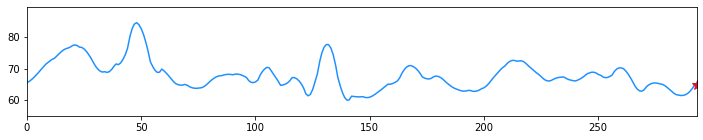

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x = np.linspace(0, len(l), len(l) * 10)
y = np.interp(x, np.arange(len(l)), l)

fig, ax = plt.subplots(figsize = (12,2))
line,  = ax.plot(x, y, color='dodgerblue')
pt_on, = ax.plot(x, y, color='crimson', marker = '*', markersize = 10)

def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    line.axes.axis([0, max(x), min(l) - 5, max(l) + 5])
    pt_on.set_data(x[num], y[num])
    return line, pt

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line],
                              interval = 1, blit=True)
ani.save('test.gif')
plt.show()

In [41]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=4000)

ani.save('heartrate_animation.mp4', writer=writer)